# Boston Food Violation Analysis

Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

Load data

In [3]:
data = pd.read_csv('C://Users//69018//Desktop//VL folder//CAPSTONE//tmppgx_njve.csv',encoding = "ISO-8859-1")

C:\Users\69018\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Check if data is loaded

In [4]:
data.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"


# Data Exploration

In [5]:
data.columns

Index(['businessname', 'dbaname', 'legalowner', 'namelast', 'namefirst',
       'licenseno', 'issdttm', 'expdttm', 'licstatus', 'licensecat',
       'descript', 'result', 'resultdttm', 'violation', 'viollevel',
       'violdesc', 'violdttm', 'violstatus', 'statusdate', 'comments',
       'address', 'city', 'state', 'zip', 'property_id', 'location'],
      dtype='object')

Null Value Summary of columns

In [13]:
data.isnull().sum()

businessname         0
dbaname         579826
legalowner      180175
namelast             0
namefirst          114
licenseno            0
issdttm              0
expdttm              0
licstatus            0
licensecat           0
descript             0
result               0
resultdttm           0
violation        32770
viollevel        32770
violdesc         32781
violdttm             0
violstatus       32770
statusdate      341880
comments             4
address              0
city                27
state                0
zip                235
property_id     130968
location        166357
dtype: int64

Check license status of restaurants

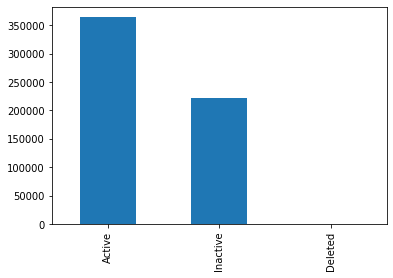

In [40]:
data['licstatus'].value_counts().plot.bar()

Use only active restaurants

In [41]:
active=data[data['licstatus'] =='Active']

In [42]:
active['violstatus'].value_counts()

Fail    190060
Pass    154717
          2137
Name: violstatus, dtype: int64

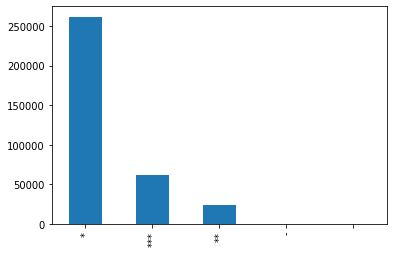

In [43]:
active['viollevel'].value_counts().plot.bar()

Missing Values within Active Restaurants

Text(0.5, 1.0, 'counts of missing value')

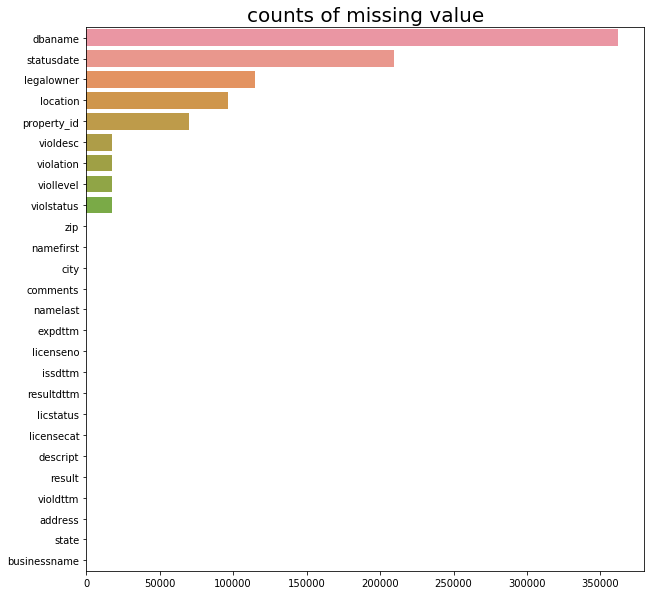

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x=active.isnull().sum().sort_values(ascending=False),y=data.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value",size=20)

In [47]:
active['violstatus'].count()

346914

In [48]:
active['businessname'].value_counts()

Dunkin Donuts                          2190
Subway                                 1843
The Real Deal                          1454
Dunkin' Donuts                         1282
Burger King                            1003
                                       ... 
MIKE'S PASTRY INC.                        1
Maverick Multi Service Groceri Inc.       1
Good Bite                                 1
Mary Ann's                                1
Blue Mountain Jamaican Restaurant         1
Name: businessname, Length: 3465, dtype: int64

Drop Duplicates 

In [51]:
active_clean=active.drop_duplicates()

Duplicate Differences

In [52]:
len(active)-len(active_clean)

8